<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Copy_of_Assigment_02_OrganA_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

**Assignment 1: Neural Networks for Analysis of Tabular Data**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)



## **Change your Runtime Now**

Before you can begin, you will need to change your Runtime from CPU to an accelerated Runtime, either a GPU or a TPU. This assignment has been validated to run on the `A100` GPU, but other GPUs and TPUs will probably work equally well.

# **READ CAREFULLY**

The **_second_**  digit in your myUTSA ID (e.g. "abc123") will determine which dataset you are to analyze for this assignment. For example, if your myUTSA ID was **vue682**, then your second digit is the number `8`.

**---WARNING------WARNING------WARNING------WARNING------WARNING------WARNING---**

You are **not** free to choose any dataset for this assignment. If analyze the wrong dataset, your assignment will **NOT BE GRADED** and you will receive a `0`.

If you are uncertain which dataset you should be working on, contact your Instructor for help. Remember, your score in this assignment will have a large impact on your course grade so please be careful.


| **2nd Digit myUTSA ID** | **Dataset to Analyze**  | **Datafile Name**
--------------------------|-------------------------|-----------------
0                         | DermaMNIST              | dermamnist_64.npz
1                         | OCTMNIST                | octmnist.npz
2                         | PneumoniaMNIST          | pneumoniamnist_64.npz
3                         | BreastMNIST             | breastmnist_224.npz
4                         | PathMNIST               | pathmnist_128.npz
5                         | BloodMNIST              | bloodmnist_128.npz
6                         | TissueMNIST             | tissuemnist.npz
7                         | OrganMNIST - A          | organamnist.npz
8                         | OrganMNIST - C          | organcmnist.npz
9                         | OrganMNIST - S          | organsmnist.npz

# **The Purpose of Assignments**

In this course, **_Assignments_** are designed to help me (and you) assess your ability to transfer knowledge gained in completing class coding exercises to solving more realistic problems.

Assignments play a pivotal role in reinforcing your learning, as they require you to apply theoretical concepts to practical scenarios. This helps solidify your understanding and enhances your problem-solving skills. By tackling these assignments independently, you develop critical thinking and the ability to synthesize information from various sources. Moreover, assignments encourage you to explore topics more deeply, fostering intellectual curiosity and promoting a deeper engagement with the subject matter. Ultimately, these assignments are not just a measure of your learning, but a means to equip you with the skills needed for real-world applications and future challenges.

## **MAKE A COPY OF THIS NOTBOOK!**

For your assignment to be graded, you **must** make a copy of this Colab notebook in your GDrive and you **must** use this copy as your worksheet.

## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [1]:
# YOU MUST RUN THIS CELL FIRST

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this assignment.")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab
david.senseman@gmail.com


Your GMAIL address **must** appear in the output in order for your work to be graded.

## **Accelerated Run-time Check**

You MUST run the following code cell to get credit for this assignment. The code in this cell checks what hardware acceleration you are using. To run this lesson, you must be running either a Graphics Processing Unit (GPU) or a Tensor Processing Unit (TPU). This lesson has been validated using the A100 GPU but other hardware assisted environments should also work.

In [2]:
# You must run this cell second

import tensorflow as tf

def check_device():
    # Check for available devices
    devices = tf.config.list_physical_devices()

    # Initialize device flags
    cpu = False
    gpu = False
    tpu = False

    # Check device types
    for device in devices:
        if device.device_type == 'CPU':
            cpu = True
        elif device.device_type == 'GPU':
            gpu = True
        elif device.device_type == 'TPU':
            tpu = True

    # Output device status
    if tpu:
        print("Running on TPU")
    elif gpu:
        print("Running on GPU")
    elif cpu:
        print("Running on CPU")
        print("WARNING: You must run this assigment using either a GPU or a TPU to earn credit")
        print("Change your RUNTIME now!")
    else:
        print("No compatible device found")
        print("WARNING: You must run this assigment using either a GPU or a TPU to earn credit")
        print("Change your RUNTIME now!")

# Call the function
check_device()

Running on GPU


In order for your assignment to be graded, the output from the last code cell should say either "Running on GPU".

# **Assignment_02: Convolutional Neural Networks (CNN) for Computer Vision**

**Assignment_02** is specifically designed to assess your ability to write the Python/Tensorflow/Keras code necessary to build neural networks that can analyze medical images using Convultional Neural Networks (CNNs).

Like **Assignment_01**, this assignment is broken down into a series of steps to make your coding task easier. For guidance in writting your code, look at `Class_03_1`.  


# **Descriptions of Data Sets for Assignment_02**

This section describes the various Medical MNIST datasets that will be used in this assignment.


-----------------------------


## **DermaMNIST - 2nd myUTSA Digit = 0**

#### **Filename:** `dermamnist_64.npz`

**DermaMNIST** is a medical imaging dataset containing 7,000 images of skin lesions, each with a resolution of 64x64 pixels. It is designed for dermatological image classification and is based on the HAM10000 dataset, which includes multi-source dermatoscopic images of common pigmented skin lesions. The dataset is structured as a multi-class classification task, categorizing images into seven different skin conditions, including melanoma, basal cell carcinoma, and benign keratosis-like lesions


------------------------------------------

## **OCTMNIST Dataset - 2nd myUTSA Digit = 1**

#### **Filename:** `octmnist.npz`

**OCTMNIST** is a medical imaging dataset containing **109,309 optical coherence tomography (OCT) images**, designed for retinal disease classification. The dataset consists of four diagnosis categories, making it a multi-class classification task. The images are grayscale and originally vary in size between (384–1,536)x(277–512) pixels, but they have now been center-cropped and resized to 28x28 pixels for standardization.


-----------------------------------------

## **PneumoniaMNIST Dataset - 2nd myUTSA Digit = 2**

#### **Filename:** `pneumoniamnist_64.npz`

**PneumoniaMNIST** is a medical imaging dataset containing **5,856 pediatric chest X-ray images**, designed for binary classification of pneumonia versus normal cases. The dataset is derived from a prior collection of chest X-rays and has been preprocessed to standardize image sizes. The original images vary in resolution between (384–2,916)×(127–2,713) pixels, but they are now center-cropped and resized to 28×28 pixels for consistency


-----------------------------------

-----------------------------


## **BreastMNIST - 2nd myUTSA Digit = 3**

#### **Filename:** `breastmnist_224.npz`

**BreastMNIST** is a medical imaging dataset that is part of the MedMNIST collection, designed for breast cancer classification using **10,239 mammography images**. The dataset consists of two classes: benign and malignant, making it a binary classification task. The images are preprocessed and standardized to a resolution of 224x224 pixels, ensuring consistency for deep learning applications.


------------------------------------------

## **PathMNIST Dataset - 2nd myUTSA Digit = 4**

#### **Filename:** `pathmnist_128.npz`

**PathMNIST** is a medical imaging dataset derived from **colorectal cancer histology slides**. It consists of 100,000 non-overlapping image patches from hematoxylin & eosin-stained histological images, with an additional 7,180 image patches from a separate clinical center for testing. The dataset is structured as a multi-class classification task, categorizing images into nine different tissue types, including adipose, lymphocytes, mucus, smooth muscle, normal colon mucosa, cancer-associated stroma, and colorectal adenocarcinoma epithelium

-----------------------------------------

## **PneumoniaMNIST Dataset - 2nd myUTSA Digit = 5**

#### **Filename:** `pneumoniamnist_64.npz`

**BloodMNIST** is a medical imaging dataset containing **17,092 images of blood samples**, categorized into eight different classes. The dataset is designed for hematology-related classification tasks, helping researchers develop AI models for blood cell analysis. The images were originally 3x360x363 pixels, but they have been center-cropped to 3x200x200 pixels and then resized to 3x28x28 pixels for standardization


-----------------------------------

-----------------------------


## **TissueMNIST - 2nd myUTSA Digit = 6**

#### **Filename:** `tissuemnist.npz`

**TissueMNIST** is a medical imaging dataset derived from BBBC051, a collection of **human kidney cortex cell images** from the Broad Bioimage Benchmark Collection. It contains 236,386 grayscale images of segmented kidney cells, categorized into eight different tissue types, including collecting ducts, glomerular endothelial cells, leukocytes, and proximal tubule segments.

Each image originally has 32x32x7 pixels, where 7 represents different slices of the same tissue sample. To standardize the dataset, the maximum pixel values across slices are taken, and the images are resized to 28x28 pixels


------------------------------------------

## **OrganMNIST-A Dataset - 2nd myUTSA Digit = 7**

#### **Filename:** `organamnist.npz`

**OrganMNIST-A**, the "A" stands for "Axial", referring to the axial view of medical imaging scans. OrganMNIST-A is derived from **full-body CT scans**, and it specifically contains axial slices of different organs, making it a structured dataset for organ classification tasks.



------------------------------------------

## **OrganMNIST-C Dataset - 2nd myUTSA Digit = 8**

#### **Filename:** `organcmnist.npz`

**OrganMNIST-C**, the "C" stands for "Coronal", referring to the coronal view of medical imaging scans. OrganMNIST-C is derived from **full-body CT scans**, and it specifically contains coronal slices of different organs, making it a structured dataset for organ classification tasks.



------------------------------------------

## **OrganMNIST-S Dataset - 2nd myUTSA Digit = 9**

#### **Filename:** `organsmnist.npz`

**OrganAMNIST**, the "S" stands for "Sagittal", referring to the saggital view of medical imaging scans. OrganAMNIST is derived from **full-body CT scans**, and it specifically contains sagittal slices of different organs, making it a structured dataset for organ classification tasks.



-----------------------------------------------------
-----------------------------------------------------

# **General Instructions**

To make the assignment more manageable, you will given a number of specific steps to perform. These steps correspond to the steps used in Example 1 (and Execise 1) in `Class_03_1`.

## **Can I Use AI?**

You are free to use AI (e.g. Microsoft Co-Pilot) to help you complete your assignment---but you need need to be *very* careful. Since AI doesn't really understand what your code is trying to do, it often starts adding additional code and variables that generate an incorrect output. Even worse, it can also give you code that is totally incorrect for this assignment.

If your aren't sure what you are doing, it's much, much safer to get help with any of your coding problems from your course instructor and/or course TA's.

## Create Functions for this Assignment

In order to complete this assignment, you will need to create several functions by running the next code cell.

In [3]:
# Create functions for this lesson

import psutil
import os

def check_current_ram():
  ram = psutil.virtual_memory()
  print(f"Available RAM: {ram.available / (1024 ** 3):.2f} GB")

def list_files():
   files = os.listdir('.')
   print(f"Current files: {files}")

def list_extract():
  files = os.listdir(EXTRACT_TARGET)
  print(f"Current files in EXTRACT_TARGET: {files}")

# Simple function to print out elasped time
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

# List files in current directory
list_files()

Current files: ['.config', 'drive', 'sample_data']


## **Step - 1: Setup Evironmental Variables**

In the cell below, create environmental variables so you can download your specific MedMNIST dataset that has been assigned to you. If you don't use the code provided in Class_03_1 as a template, you will make an unacceptable number of coding errors.

If you use the code from Step 1 in Class_03_1, you will only need to make changes to the `DOWNLOAD_SOURCE` and the `EXTRACT_TARGET`.

For your `EXTRACT_TARGET` you should use the file name of the MedMNIST assigned to you in the cell above, **exactly** as it is written.

For example, if the 2nd digit of your myUTSA ID was `0`, your `DOWNLOAD_SOURCE` would be:
~~~text
DOWNLOAD_SOURCE = URL+"/dermamnist_64.npz"
~~~
and your `EXTRACT_TARGET` would be:
~~~text
EXTRACT_TARGET = os.path.join(PATH,"dermamnist_64")
~~~

Be careful when you cut-and-paste that you don't accidently include any spaces.


In [4]:
# Insert your code for Step 1 here

import os

# Define datafile location
URL = "https://biologicslab.co/BIO1173/data"
DOWNLOAD_SOURCE = URL+"/organamnist.npz"
DOWNLOAD_NAME = DOWNLOAD_SOURCE[DOWNLOAD_SOURCE.rfind('/')+1:]
print(f"DOWNLOAD_SOURCE {DOWNLOAD_SOURCE}")
print(f"DOWNLOAD_NAME {DOWNLOAD_NAME}")

# Define folder locations to store the data
PATH = "/content"
EXTRACT_TARGET = os.path.join(PATH,"/organamnist")
SOURCE = os.path.join(EXTRACT_TARGET)
TARGET = SOURCE

# Print out environmental variables
print(f"PATH {PATH}")
print(f"EXTRACT_TARGET {EXTRACT_TARGET}")
print(f"SOURCE {SOURCE}")
print(f"TARGET {TARGET}")

DOWNLOAD_SOURCE https://biologicslab.co/BIO1173/data/organamnist.npz
DOWNLOAD_NAME organamnist.npz
PATH /content
EXTRACT_TARGET /organamnist
SOURCE /organamnist
TARGET /organamnist


## **Step - 2: Download and Extract Data**

If your code in Step 1 is correct, you should be ready to download and extract your dataset.

In the cell below, write the code to download your datafile, make the appropiate file folders and then extract (unzip) your datafile into the file folders you created.

**Please Note:** There is considerable differences in the size of these MedMNIST datasets. The larger ones are more than 3GB in size and may require several minutes to upload the file to Colab and then to extract it.

As long as the "little wheel" at the top left of the code cell keeps spinning, your code is working correctly, so be patient.

In [5]:
# Insert your code for Step 2 here
import os

print("Creating necessary directories...", end='')
# Create necessary directories
os.makedirs(SOURCE, exist_ok=True)
os.makedirs(EXTRACT_TARGET, exist_ok=True)
print("done.")

print("Downloading files...", end='')
# Define paths and URLs
download_path = os.path.join(PATH, DOWNLOAD_NAME)
extract_path = os.path.join(EXTRACT_TARGET, DOWNLOAD_NAME)

# Download the file
os.system(f"wget -O {download_path} {DOWNLOAD_SOURCE}")
print("done.")

print("Extracting files...", end='')
# Extract the file
os.system(f"unzip -o -d {EXTRACT_TARGET} {download_path} >/dev/null")
print("done.")

Creating necessary directories...done.
Extracting files...done.


### **Step - 3: Load and Shuffle Images and Labels into Numpy arrays**

In the cell below, write the Python code to read (load) and shuffle the image and label data into Numpy arrays. In total, you should create the following 6 numpy arrays: `train_X`, `train_Y`, `test_X`, `test_Y`, `val_X` and `val_Y`. The `X` arrays will have the images, the `Y` arrays will have their corresponding labels.

Make sure to print out the `shape` of each numpy array.  

In [6]:
# Insert your code for Step 3 here
import numpy as np


# ------------------------------------------------------------------------
# 1️⃣  Unpack and shuffle train images
# ------------------------------------------------------------------------
eg_train_images = np.load(os.path.join(SOURCE,"train_images.npy"),)
eg_train_labels = np.load(os.path.join(SOURCE,"train_labels.npy"),)
combined = list(zip(eg_train_images, eg_train_labels))
np.random.shuffle(combined)
eg_X_train, eg_Y_train = zip(*combined)
eg_X_train = np.array(eg_X_train)
eg_Y_train = np.array(eg_Y_train)
print(f"eg_X_train: {eg_X_train.shape}")
print(f"eg_Y_train: {eg_Y_train.shape}")

# ------------------------------------------------------------------------
# 2️⃣  Unpack and shuffle test images
# ------------------------------------------------------------------------
test_images = np.load(os.path.join(SOURCE,"test_images.npy"),)
test_labels = np.load(os.path.join(SOURCE,"test_labels.npy"),)
combined = list(zip(test_images, test_labels))
np.random.shuffle(combined)
eg_X_test, eg_Y_test = zip(*combined)
eg_X_test = np.array(eg_X_test)
eg_Y_test = np.array(eg_Y_test)
print(f"eg_X_test: {eg_X_test.shape}")
print(f"eg_Y_test: {eg_Y_test.shape}")

# ------------------------------------------------------------------------
# 3️⃣  Unpack and shuffle validation images
# ------------------------------------------------------------------------
# Unpack and shuffle val_images
val_images = np.load(os.path.join(SOURCE,"val_images.npy"),)
val_labels = np.load(os.path.join(SOURCE,"val_labels.npy"),)
combined = list(zip(val_images, val_labels))
np.random.shuffle(combined)
eg_X_val, eg_Y_val = zip(*combined)
eg_X_val = np.array(eg_X_val)
eg_Y_val = np.array(eg_Y_val)
print(f"eg_X_val: {eg_X_val.shape}")
print(f"eg_Y_val: {eg_Y_val.shape}")

eg_X_train: (34561, 28, 28)
eg_Y_train: (34561, 1)
eg_X_test: (17778, 28, 28)
eg_Y_test: (17778, 1)
eg_X_val: (6491, 28, 28)
eg_Y_val: (6491, 1)


### **Step 4 - Add Color Channel and Resize Images**

In [7]:
# Insert your code for Step 4 here
import numpy as np
import tensorflow as tf

# ------------------------------------------------------------------------
# 1️⃣  Add a color channel if not already present
# ------------------------------------------------------------------------
if eg_X_train.ndim == 4:
    print("No need to add a color channel, images are RGB")
else:
    print("Adding monochrome color channel...", end='')
    eg_X_train = np.expand_dims(eg_X_train, axis=-1)
    eg_X_test = np.expand_dims(eg_X_test, axis=-1)
    eg_X_val = np.expand_dims(eg_X_val, axis=-1)
    print("done")

# ------------------------------------------------------------------------
# 2️⃣  Resize images if they are less than 64 pixels
# ------------------------------------------------------------------------
if eg_X_train.shape[1] >= 64:
    print("No need to resize images--already 64x64 (or more) pixels")
    eg_X_train_resized = eg_X_train
    eg_X_test_resized = eg_X_test
    eg_X_val_resized = eg_X_val
else:
    print("Resizing images to 64x64 pixels...", end='')
    eg_X_train_resized = np.array([tf.image.resize(img, (64, 64)).numpy() for img in eg_X_train])
    eg_X_test_resized = np.array([tf.image.resize(img, (64, 64)).numpy() for img in eg_X_test])
    eg_X_val_resized = np.array([tf.image.resize(img, (64, 64)).numpy() for img in eg_X_val])
    print("done")

# ------------------------------------------------------------------------
# 3️⃣  Copy back
# ------------------------------------------------------------------------
eg_X_train = np.copy(eg_X_train_resized)
eg_X_test = np.copy(eg_X_test_resized)
eg_X_val = np.copy(eg_X_val_resized)


# ------------------------------------------------------------------------
# 4️⃣   Check shapes
# ------------------------------------------------------------------------
print(eg_X_train.shape)
print(eg_X_test.shape)
print(eg_X_val.shape)

Adding monochrome color channel...done
Resizing images to 64x64 pixels...done
(34561, 64, 64, 1)
(17778, 64, 64, 1)
(6491, 64, 64, 1)


### Example - Step 5: Check Available Memory

The code in the cell below shows how to check the used and the available memory in a Colab session. As will be explained below, knowing the amount of available memory can be useful during data processing. If you perform a function that increases the size of a dataset beyond what can be held in the available memory, your Colab session will _crash!_

In [11]:
# Insert your code for Step 5 here

import psutil

# Get the memory details
mem = psutil.virtual_memory()

# Print total, available, and used memory
print(f"Total Memory: {mem.total / (1024 ** 3):.2f} GB")
print(f"Available Memory: {mem.available / (1024 ** 3):.2f} GB")
print(f"Used Memory: {mem.used / (1024 ** 3):.2f} GB")

Total Memory: 167.05 GB
Available Memory: 161.72 GB
Used Memory: 3.98 GB


## **Step - 6: Augment Training Image Set**

In [12]:
# Insert your code for Step 6 here
import numpy as np
import psutil

# ------------------------------------------------------------------------
# 1️⃣  Get the memory details
# ------------------------------------------------------------------------
mem = psutil.virtual_memory()

# ------------------------------------------------------------------------
# 2️⃣  Augment if available memory is sufficient
# ------------------------------------------------------------------------
if mem.available <= mem.used:
    print(f"Available memory ({mem.available / (1024 ** 3):.2f} GB) might not be enough to augment eg_X_train")
    print(f"Number of eg_X_train images: {eg_X_train.shape[0]}")
else:
    print(f"Available memory ({mem.available / (1024 ** 3):.2f} GB) should be enough to augment eg_X_train")
    print("Augmenting the number of images in eg_X_train...", end=' ')

    # Initialize lists to store the augmented images and labels
    augmented_images = []
    augmented_labels = []

    # Iterate through each image and its corresponding label
    for img, label in zip(eg_X_train, eg_Y_train):
        # Original image
        augmented_images.append(img)
        augmented_labels.append(label)

        # Vertically flipped image
        augmented_images.append(np.flipud(img))
        augmented_labels.append(label)

        # Horizontally flipped image
        augmented_images.append(np.fliplr(img))
        augmented_labels.append(label)

    # Convert lists back to numpy arrays
    augmented_images = np.array(augmented_images)
    augmented_labels = np.array(augmented_labels)

    print("done")
    print(f"Original number of eg_X_train images: {len(eg_X_train)}")
    print(f"Augmented number of eg_X_train images: {len(augmented_images)}")

    # Copy images back
    eg_X_train = np.copy(augmented_images)
    eg_Y_train = np.copy(augmented_labels)

Available memory (161.77 GB) should be enough to augment eg_X_train
Augmenting the number of images in eg_X_train... done
Original number of eg_X_train images: 34561
Augmented number of eg_X_train images: 103683


### **Step - 7: One-Hot Encode Labels**

In [13]:
# Insert your code for Step 7 here

from tensorflow.keras.utils import to_categorical
import numpy as np

# ------------------------------------------------------------------------
# 1️⃣  Determine the number of classes
# ------------------------------------------------------------------------
classes, counts = np.unique(eg_Y_test, return_counts=True)
class_count = len(classes)
print(f"The label data contains {class_count} classes")

# ------------------------------------------------------------------------
# 2️⃣  One-hot encode Y values
# ------------------------------------------------------------------------
eg_Y_train = to_categorical(eg_Y_train, num_classes=class_count)
eg_Y_test = to_categorical(eg_Y_test, num_classes=class_count)
eg_Y_val = to_categorical(eg_Y_val, num_classes=class_count)

# ------------------------------------------------------------------------
# 3️⃣  Print results
# ------------------------------------------------------------------------
print(f'Train Labels Shape (eg_Y_train): {eg_Y_train.shape}')
print(f'Test Labels Shape (eg_Y_test): {eg_Y_test.shape}')
print(f'Validation Labels Shape (eg_Y_val): {eg_Y_val.shape}')

The label data contains 11 classes
Train Labels Shape (eg_Y_train): (103683, 11)
Test Labels Shape (eg_Y_test): (17778, 11)
Validation Labels Shape (eg_Y_val): (6491, 11)


### **Step - 8: Create and Compile CNN neural network model**

In [14]:
# Insert your code for Step 8 here

# ------------------------------------------------------------------------
# 0️⃣  Load packages
# ------------------------------------------------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import numpy as np


# ------------------------------------------------------------------------
# 1️⃣  Define variables
# ------------------------------------------------------------------------
# Define input_dim: Must be the pixel size of your images
input_dim = (64, 64, 1)

# Sete learning rate
learning_rate = 0.001

# Set Persistance
PATIENCE=10

# ------------------------------------------------------------------------
# 2️⃣  Create CNN model
# ------------------------------------------------------------------------
eg_model = Sequential([
    # Input Layer
    Input(shape=input_dim),

    # 1st Convolution layer
    Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    # 2nd Convolution layer
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.5),

    # 3rd Convolution layer
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.5),

    # 4th Convolution layer
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.5),

    # Flatten the results to feed into a DNN
    Flatten(),
    Dropout(0.5),

    # 512 neuron hidden layer
    Dense(512, activation='relu'),
    BatchNormalization(),

    # Output layer has neurons equal to class_count
    Dense(class_count, activation='softmax')
])

# ------------------------------------------------------------------------
# 3️⃣  Compile model
# ------------------------------------------------------------------------
eg_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)

# ------------------------------------------------------------------------
# 4️⃣  Create early stopping monitor
# ------------------------------------------------------------------------
eg_stop_monitor = EarlyStopping(monitor='val_loss',
                 min_delta=1e-3, patience=PATIENCE,
                 verbose=1, mode='auto',
                 restore_best_weights=True)

# Print number of classes to be used
print(f"The number of output classes =",class_count)

# Print model summary
eg_model.summary()

The number of output classes = 11


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 31, 31, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 368,459 (1.41 MB)

 Trainable params: 366,955 (1.40 MB)

 Non-trainable params: 1,504 (5.88 KB)

### **Step - 9: Train the Neural Network**

In [15]:
# Insert your code for Step 9 here

import time
import tensorflow as tf
import numpy as np

# ------------------------------------------------------------------------
# 1️⃣  Set variables
# ------------------------------------------------------------------------
EPOCHS = 100
BATCH_SIZE = 64
VERBOSE=2  # 2 means output during training
STEPS_PER_EPOCH = len(eg_X_train) // BATCH_SIZE


# ------------------------------------------------------------------------
# 2️⃣  Train model
# ------------------------------------------------------------------------
print(f"----- Training is starting for {EPOCHS} epochs, batch size: {BATCH_SIZE}, steps per epoch: {STEPS_PER_EPOCH}  --------------")
# Record start time
start_time = time.time()

# Train model
eg_history = eg_model.fit(eg_X_train, eg_Y_train,
                    validation_data=(eg_X_val, eg_Y_val),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    callbacks=[eg_stop_monitor],
                    verbose=VERBOSE
)


# ---------------------------------------------------------------------------
# 9️⃣ Inspect training
# ---------------------------------------------------------------------------
print(f"\nTraining finished.")
print(f"Best val accuracy: {np.max(eg_history.history['val_accuracy']):.4f}")
# Record end time
elapsed_time = time.time() - start_time

# Print elapsed time
print(f"Elapsed time: {hms_string(elapsed_time)}")

----- Training is starting for 100 epochs, batch size: 64, steps per epoch: 1620  --------------
Epoch 1/100
1620/1620 - 21s - 13ms/step - accuracy: 0.5907 - loss: 1.6570 - val_accuracy: 0.6270 - val_loss: 1.2868
Epoch 2/100


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1620/1620 - 7s - 4ms/step - accuracy: 0.6667 - loss: 0.9302 - val_accuracy: 0.7207 - val_loss: 1.0930
Epoch 3/100
1620/1620 - 6s - 3ms/step - accuracy: 0.6877 - loss: 1.0557 - val_accuracy: 0.5235 - val_loss: 1.6939
Epoch 4/100
1620/1620 - 0s - 185us/step - accuracy: 0.6667 - loss: 2.2302 - val_accuracy: 0.5754 - val_loss: 1.4417
Epoch 5/100
1620/1620 - 6s - 4ms/step - accuracy: 0.7119 - loss: 1.0077 - val_accuracy: 0.7255 - val_loss: 1.0444
Epoch 6/100
1620/1620 - 0s - 184us/step - accuracy: 0.0000e+00 - loss: 1.9853 - val_accuracy: 0.5130 - val_loss: 1.8601
Epoch 7/100
1620/1620 - 6s - 3ms/step - accuracy: 0.7258 - loss: 0.9755 - val_accuracy: 0.8378 - val_loss: 0.7976
Epoch 8/100
1620/1620 - 0s - 191us/step - accuracy: 0.3333 - loss: 1.2996 - val_accuracy: 0.8234 - val_loss: 0.7931
Epoch 9/100
1620/1620 - 6s - 4ms/step - accuracy: 0.7320 - loss: 0.9673 - val_accuracy: 0.6925 - val_loss: 1.1228
Epoch 10/100
1620/1620 - 0s - 188us/step - accuracy: 0.3333 - loss: 1.5935 - val_accuracy:

------------------------------------------------

## **Evaluating Model's Training**


### **Step 10: Plot `accuracy` and `val_accuracy`**

Best validation accuracy: 0.8527
Best validation loss: 0.7000


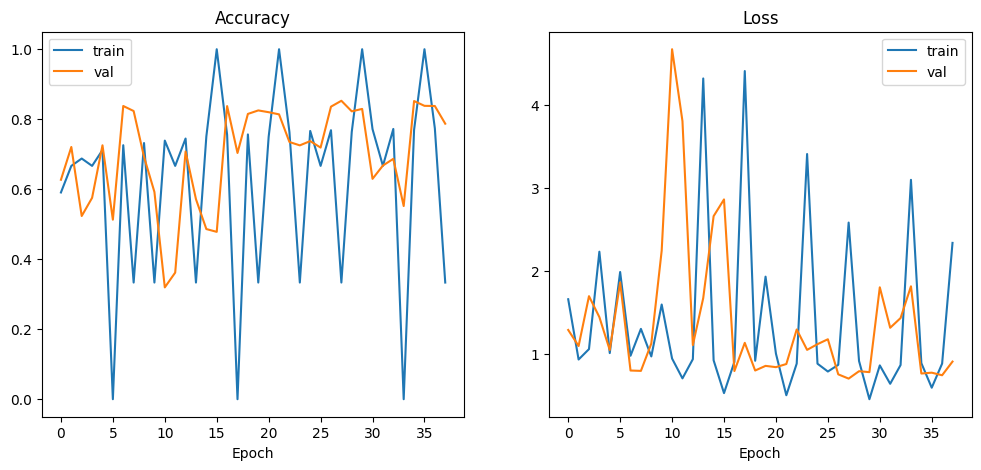

In [16]:
# Insert your code for Step 10 here


import numpy as np

# Show the best validation accuracy
best_val_acc = np.max(eg_history.history['val_accuracy'])
print(f"Best validation accuracy: {best_val_acc:.4f}")

# Show the best validation loss
best_val_loss = np.min(eg_history.history['val_loss'])
print(f"Best validation loss: {best_val_loss:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(eg_history.history['accuracy'], label='train')
plt.plot(eg_history.history['val_accuracy'], label='val')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(eg_history.history['loss'], label='train')
plt.plot(eg_history.history['val_loss'], label='val')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

### **Step 11: Plot Image with Label**

Make sure you use a meaningful label, **not** the label used in Class_03_1, Step 11. For example, if your datafile was `pathmnist_128`, you label might say `Organ type` or `Pathology type`. Do not use `Blood Cell type` unless you analyzing the bloodcell datafile, `bloodmnist_224`.


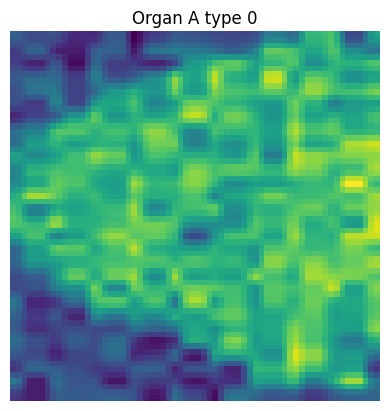

In [17]:
# Insert your code for Step 11 here
import matplotlib.pyplot as plt
import numpy as np

# Define test image number
img_num=10

# Read the image data
image = eg_X_test[img_num]

# Display the image
plt.imshow(image)
plt.title('Organ A type ' + str(np.argmax(eg_Y_test[img_num])))
plt.axis('off')  # Hide the axis
plt.show()

### **Step 12: Plot 4 Frames with Label**

**NOTE:** This step is incorrectly called **Step 13** in "Class_03_1, Exercise - Step 13."

Again, make sure you use a meaningful label, **not** the label used in Class_03_1, Step 12. For example, if your datafile was `pathmnist_128`, you label might say `Organ type` or `Pathology type`. Do not use `Blood Cell type` unless you analyzing the bloodcell datafile, `bloodmnist_224`.


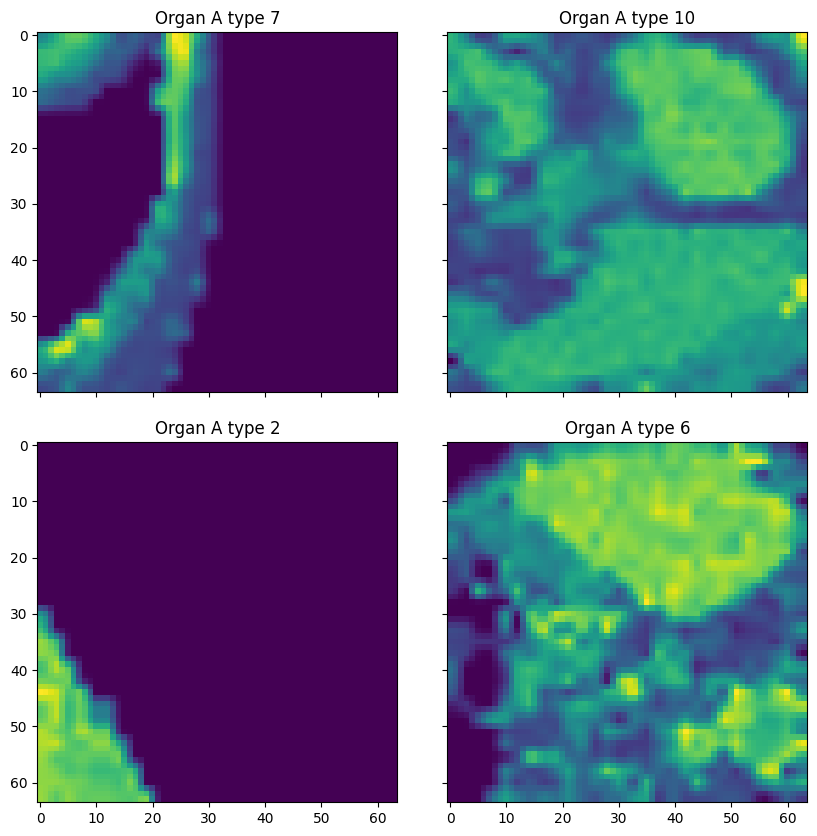

In [18]:
# Insert your code for Step 12 here

# Example - Step 12: Plot 4 frames with label

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


# Set figure size
fig = plt.figure(figsize=(10,10))
grid = ImageGrid(
        fig, 111,
        nrows_ncols=(2,2),
        axes_pad=0.5
)

# Plot 4 images
for x in range(0,4):
    grid[x].set_title('Organ A type ' + str(np.argmax(eg_Y_test[x])))
    grid[x].imshow(eg_X_test[x])


## **Assignment Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Microsoft Print to PDF** if you are running either Windows 10 or 11 to generate a PDF of your Colab notebook. If you have a Mac, use the **File --> Print.. --> Save as PDF**

In either case, save your PDF as `Copy of Assignment_02.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.

**NOTE TO WINDOWS USERS:** You will automatically lose **10 points** if your PDF is missing pages when being graded in Canvas and the grader has take the additional steps to download your PDF, print it out using **Microsoft Print to PDF** and then resubmit to Canvas for grading.

## **Poly-A Tail**


## **Convolutional neural network**

![__](https://biologicslab.co/BIO1173/images/Assignment_02_image01.png)

A **Convolutional Neural Network (CNN)** is a type of feedforward neural network that learns features via filter (or kernel) optimization. This type of deep learning network has been applied to process and make predictions from many different types of data including text, images and audio. Convolution-based networks are the de-facto standard in deep learning-based approaches to computer vision and image processing, and have only recently been replaced—in some cases—by newer deep learning architectures such as the transformer.

**Vanishing gradients** and exploding gradients, seen during **backpropagation** in earlier neural networks, are prevented by the regularization that comes from using shared weights over fewer connections. For example, for each neuron in the fully-connected layer, 10,000 weights would be required for processing an image sized 100 x 100 pixels. However, applying cascaded convolution (or cross-correlation) kernels, only 25 weights for each convolutional layer are required to process 5x5-sized tiles. Higher-layer features are extracted from wider context windows, compared to lower-layer features.

Some applications of CNNs include:

* image and video recognition,
* recommender systems,
* image classification,
* image segmentation,
* **medical image analysis**
* natural language processing,
* brain–computer interfaces, and
* financial time series.

CNNs are also known as **shift invariant** or **space invariant artificial neural networks**, based on the shared-weight architecture of the convolution kernels or filters that slide along input features and provide translation-equivariant responses known as feature maps. Counter-intuitively, most convolutional neural networks are not invariant to translation, due to the downsampling operation they apply to the input.

**Feedforward neural networks** are usually fully connected networks, that is, each neuron in one layer is connected to all neurons in the next layer. The "full connectivity" of these networks makes them prone to overfitting data. Typical ways of regularization, or preventing overfitting, include: penalizing parameters during training (such as weight decay) or trimming connectivity (skipped connections, dropout, etc.) Robust datasets also increase the probability that CNNs will learn the generalized principles that characterize a given dataset rather than the biases of a poorly-populated set.

Convolutional networks were inspired by **biological processes** in that the connectivity pattern between neurons resembles the organization of the animal visual cortex. Individual cortical neurons respond to stimuli only in a restricted region of the visual field known as the receptive field. The receptive fields of different neurons partially overlap such that they cover the entire visual field.

CNNs use relatively little pre-processing compared to other image classification algorithms. This means that the network learns to optimize the filters (or kernels) through automated learning, whereas in traditional algorithms these filters are hand-engineered. This simplifies and automates the process, enhancing efficiency and scalability overcoming human-intervention bottlenecks.

**Architecture**

A convolutional neural network consists of an input layer, hidden layers and an output layer. In a convolutional neural network, the hidden layers include one or more layers that perform convolutions. Typically this includes a layer that performs a **dot product** of the convolution kernel with the layer's input matrix. This product is usually the Frobenius inner product, and its activation function is commonly ReLU. As the convolution kernel slides along the input matrix for the layer, the convolution operation generates a feature map, which in turn contributes to the input of the next layer. This is followed by other layers such as pooling layers, fully connected layers, and normalization layers. Here it should be noted how close a convolutional neural network is to a matched filter.

**Convolutional layers**
In a CNN, the input is a tensor with shape:

(number of inputs) x (input height) x (input width) × (input channels)

After passing through a convolutional layer, the image becomes abstracted to a feature map, also called an activation map, with shape:

(number of inputs) x (feature map height) x (feature map width) x (feature map channels).

Convolutional layers convolve the input and pass its result to the next layer. This is similar to the response of a neuron in the visual cortex to a specific stimulus. Each convolutional neuron processes data only for its receptive field.

Although fully connected feedforward neural networks can be used to learn features and classify data, this architecture is generally impractical for larger inputs (e.g., high-resolution images), which would require massive numbers of neurons because each pixel is a relevant input feature. A fully connected layer for an image of size 100 × 100 has 10,000 weights for each neuron in the second layer. Convolution reduces the number of free parameters, allowing the network to be deeper. For example, using a 5 × 5 tiling region, each with the same shared weights, requires only 25 neurons. Using shared weights means there are many fewer parameters, which helps avoid the vanishing gradients and exploding gradients problems seen during backpropagation in earlier neural networks.

To speed processing, standard convolutional layers can be replaced by depthwise separable convolutional layers, which are based on a depthwise convolution followed by a pointwise convolution. The depthwise convolution is a spatial convolution applied independently over each channel of the input tensor, while the pointwise convolution is a standard convolution restricted to the use of

**Pooling layers**

Convolutional networks may include local and/or global pooling layers along with traditional convolutional layers. Pooling layers reduce the dimensions of data by combining the outputs of neuron clusters at one layer into a single neuron in the next layer. Local pooling combines small clusters, tiling sizes such as 2 × 2 are commonly used. Global pooling acts on all the neurons of the feature map. There are two common types of pooling in popular use: max and average. Max pooling uses the maximum value of each local cluster of neurons in the feature map, while average pooling takes the average value.

**Fully connected layers**

Fully connected layers connect every neuron in one layer to every neuron in another layer. It is the same as a traditional multilayer perceptron neural network (MLP). The flattened matrix goes through a fully connected layer to classify the images.

**Receptive field**

In neural networks, each neuron receives input from some number of locations in the previous layer. In a convolutional layer, each neuron receives input from only a restricted area of the previous layer called the neuron's receptive field. Typically the area is a square (e.g. 5 by 5 neurons). Whereas, in a fully connected layer, the receptive field is the entire previous layer. Thus, in each convolutional layer, each neuron takes input from a larger area in the input than previous layers. This is due to applying the convolution over and over, which takes the value of a pixel into account, as well as its surrounding pixels. When using dilated layers, the number of pixels in the receptive field remains constant, but the field is more sparsely populated as its dimensions grow when combining the effect of several layers.

To manipulate the receptive field size as desired, there are some alternatives to the standard convolutional layer. For example, atrous or dilated convolution expands the receptive field size without increasing the number of parameters by interleaving visible and blind regions. Moreover, a single dilated convolutional layer can comprise filters with multiple dilation ratios,thus having a variable receptive field size.

**Weights**

Each neuron in a neural network computes an output value by applying a specific function to the input values received from the receptive field in the previous layer. The function that is applied to the input values is determined by a vector of weights and a bias (typically real numbers). Learning consists of iteratively adjusting these biases and weights.

The vectors of weights and biases are called filters and represent particular features of the input (e.g., a particular shape). A distinguishing feature of CNNs is that many neurons can share the same filter. This reduces the memory footprint because a single bias and a single vector of weights are used across all receptive fields that share that filter, as opposed to each receptive field having its own bias and vector weighting.

**Deconvolutional**

A deconvolutional neural network is essentially the reverse of a CNN. It consists of deconvolutional layers and unpooling layers.

A deconvolutional layer is the transpose of a convolutional layer. Specifically, a convolutional layer can be written as a multiplication with a matrix, and a deconvolutional layer is multiplication with the transpose of that matrix.

Deconvolution layers are used in image generators. By default, it creates periodic checkerboard artifact, which can be fixed by upscale-then-convolve.

### **History**

CNN are often compared to the way the brain achieves vision processing in living organisms.

**Receptive fields in the visual cortex**

Work by Hubel and Wiesel in the 1950s and 1960s showed that cat visual cortices contain neurons that individually respond to small regions of the visual field. Provided the eyes are not moving, the region of visual space within which visual stimuli affect the firing of a single neuron is known as its receptive field. Neighboring cells have similar and overlapping receptive fields. Receptive field size and location varies systematically across the cortex to form a complete map of visual space. The cortex in each hemisphere represents the contralateral visual field.

Their 1968 paper identified two basic visual cell types in the brain:

* **simple cells**, whose output is maximized by straight edges having particular orientations within their receptive field

* **complex cells**, which have larger receptive fields, whose output is insensitive to the exact position of the edges in the field.
Hubel and Wiesel also proposed a cascading model of these two types of cells for use in pattern recognition tasks.

**Fukushima's analog threshold elements in a vision model**

In 1969, Kunihiko Fukushima introduced a multilayer visual feature detection network, inspired by the above-mentioned work of Hubel and Wiesel, in which "All the elements in one layer have the same set of interconnecting coefficients; the arrangement of the elements and their interconnections are all homogeneous over a given layer." This is the essential core of a convolutional network, but the weights were not trained. In the same paper, Fukushima also introduced the ReLU (rectified linear unit) activation function.

**Neocognitron, origin of the trainable CNN architecture**

The "neocognitron" was introduced by Fukushima in 1980. The neocognitron introduced the two basic types of layers:

* **"S-layer":** a shared-weights receptive-field layer, later known as a convolutional layer, which contains units whose receptive fields cover a patch of the previous layer. A shared-weights receptive-field group (a "plane" in neocognitron terminology) is often called a filter, and a layer typically has several such filters.

* **"C-layer":** a downsampling layer that contain units whose receptive fields cover patches of previous convolutional layers. Such a unit typically computes a weighted average of the activations of the units in its patch, and applies inhibition (divisive normalization) pooled from a somewhat larger patch and across different filters in a layer, and applies a saturating activation function. The patch weights are nonnegative and are not trainable in the original neocognitron. The downsampling and competitive inhibition help to classify features and objects in visual scenes even when the objects are shifted.

Several supervised and unsupervised learning algorithms have been proposed over the decades to train the weights of a neocognitron. Today, however, the CNN architecture is usually trained through backpropagation.

Fukushima's ReLU activation function was not used in his neocognitron since all the weights were nonnegative; lateral inhibition was used instead. The rectifier has become a very popular activation function for CNNs and deep neural networks in general.

**Convolution in time**

The term "convolution" first appears in neural networks in a paper by Toshiteru Homma, Les Atlas, and Robert Marks II at the first Conference on Neural Information Processing Systems in 1987. Their paper replaced multiplication with convolution in time, inherently providing shift invariance, motivated by and connecting more directly to the signal-processing concept of a filter, and demonstrated it on a speech recognition task. They also pointed out that as a data-trainable system, convolution is essentially equivalent to correlation since reversal of the weights does not affect the final learned function ("For convenience, we denote * as correlation instead of convolution. Note that convolving a(t) with b(t) is equivalent to correlating a(-t) with b(t)."). Modern CNN implementations typically do correlation and call it convolution, for convenience, as they did here.

**Time delay neural networks**

The time delay neural network (TDNN) was introduced in 1987 by Alex Waibel et al. for phoneme recognition and was an early convolutional network exhibiting shift-invariance. A TDNN is a 1-D convolutional neural net where the convolution is performed along the time axis of the data. It is the first CNN utilizing weight sharing in combination with a training by gradient descent, using backpropagation. Thus, while also using a pyramidal structure as in the neocognitron, it performed a global optimization of the weights instead of a local one.

TDNNs are convolutional networks that share weights along the temporal dimension. They allow speech signals to be processed time-invariantly. In 1990 Hampshire and Waibel introduced a variant that performs a two-dimensional convolution. Since these TDNNs operated on spectrograms, the resulting phoneme recognition system was invariant to both time and frequency shifts, as with images processed by a neocognitron.

TDNNs improved the performance of far-distance speech recognition.

**Image recognition with CNNs trained by gradient descent**

Denker et al. (1989) designed a 2-D CNN system to recognize hand-written ZIP Code numbers. However, the lack of an efficient training method to determine the kernel coefficients of the involved convolutions meant that all the coefficients had to be laboriously hand-designed.

Following the advances in the training of 1-D CNNs by Waibel et al. (1987), Yann LeCun et al.(1989) used back-propagation to learn the convolution kernel coefficients directly from images of hand-written numbers. Learning was thus fully automatic, performed better than manual coefficient design, and was suited to a broader range of image recognition problems and image types. Wei Zhang et al. (1988) used back-propagation to train the convolution kernels of a CNN for alphabets recognition. The model was called shift-invariant pattern recognition neural network before the name CNN was coined later in the early 1990s. Wei Zhang et al. also applied the same CNN without the last fully connected layer for medical image object segmentation (1991) and breast cancer detection in mammograms (1994).

This approach became a foundation of modern computer vision.

**Max pooling**

In 1990 Yamaguchi et al. introduced the concept of max pooling, a fixed filtering operation that calculates and propagates the maximum value of a given region. They did so by combining TDNNs with max pooling to realize a speaker-independent isolated word recognition system. In their system they used several TDNNs per word, one for each syllable. The results of each TDNN over the input signal were combined using max pooling and the outputs of the pooling layers were then passed on to networks performing the actual word classification.

In a variant of the neocognitron called the cresceptron, instead of using Fukushima's spatial averaging with inhibition and saturation, J. Weng et al. in 1993 used max pooling, where a downsampling unit computes the maximum of the activations of the units in its patch, introducing this method into the vision field.

Max pooling is often used in modern CNNs.


**Shift-invariant neural network**

A shift-invariant neural network was proposed by Wei Zhang et al. for image character recognition in 1988.It is a modified Neocognitron by keeping only the convolutional interconnections between the image feature layers and the last fully connected layer. The model was trained with back-propagation. The training algorithm was further improved in 1991 to improve its generalization ability. The model architecture was modified by removing the last fully connected layer and applied for medical image segmentation (1991) and automatic detection of breast cancer in mammograms (1994).

A different convolution-based design was proposed in 1988 for application to decomposition of one-dimensional electromyography convolved signals via de-convolution. This design was modified in 1989 to other de-convolution-based designs.

**GPU implementations**

Although CNNs were invented in the 1980s, their breakthrough in the 2000s required fast implementations on graphics processing units (GPUs).

In 2004, it was shown by K. S. Oh and K. Jung that standard neural networks can be greatly accelerated on GPUs. Their implementation was 20 times faster than an equivalent implementation on CPU.In 2005, another paper also emphasised the value of GPGPU for machine learning.

The first GPU-implementation of a CNN was described in 2006 by K. Chellapilla et al. Their implementation was 4 times faster than an equivalent implementation on CPU. In the same period, GPUs were also used for unsupervised training of deep belief networks.

In 2010, Dan Ciresan et al. at IDSIA trained deep feedforward networks on GPUs. In 2011, they extended this to CNNs, accelerating by 60 compared to training CPU. In 2011, the network won an image recognition contest where they achieved superhuman performance for the first time. Then they won more competitions and achieved state of the art on several benchmarks.

Subsequently, AlexNet, a similar GPU-based CNN by Alex Krizhevsky et al. won the ImageNet Large Scale Visual Recognition Challenge 2012. It was an early catalytic event for the AI boom.

Compared to the training of CNNs using GPUs, not much attention was given to CPU. (Viebke et al 2019) parallelizes CNN by thread- and SIMD-level parallelism that is available on the Intel Xeon Phi.

**Distinguishing features**

In the past, traditional multilayer perceptron (MLP) models were used for image recognition. However, the full connectivity between nodes caused the curse of dimensionality, and was computationally intractable with higher-resolution images. A 1000×1000-pixel image with RGB color channels has 3 million weights per fully-connected neuron, which is too high to feasibly process efficiently at scale.

CNN layers arranged in 3 dimensions
For example, in CIFAR-10, images are only of size 32×32×3 (32 wide, 32 high, 3 color channels), so a single fully connected neuron in the first hidden layer of a regular neural network would have 32*32*3 = 3,072 weights. A 200×200 image, however, would lead to neurons that have 200*200*3 = 120,000 weights.

Also, such network architecture does not take into account the spatial structure of data, treating input pixels which are far apart in the same way as pixels that are close together. This ignores locality of reference in data with a grid-topology (such as images), both computationally and semantically. Thus, full connectivity of neurons is wasteful for purposes such as image recognition that are dominated by spatially local input patterns.

Convolutional neural networks are variants of multilayer perceptrons, designed to emulate the behavior of a visual cortex. These models mitigate the challenges posed by the MLP architecture by exploiting the strong spatially local correlation present in natural images. As opposed to MLPs, CNNs have the following distinguishing features:

3D volumes of neurons. The layers of a CNN have neurons arranged in 3 dimensions: width, height and depth. Where each neuron inside a convolutional layer is connected to only a small region of the layer before it, called a receptive field. Distinct types of layers, both locally and completely connected, are stacked to form a CNN architecture.
Local connectivity: following the concept of receptive fields, CNNs exploit spatial locality by enforcing a local connectivity pattern between neurons of adjacent layers. The architecture thus ensures that the learned "filters" produce the strongest response to a spatially local input pattern. Stacking many such layers leads to nonlinear filters that become increasingly global (i.e. responsive to a larger region of pixel space) so that the network first creates representations of small parts of the input, then from them assembles representations of larger areas.

* **Shared weights:** In CNNs, each filter is replicated across the entire visual field. These replicated units share the same parameterization (weight vector and bias) and form a feature map. This means that all the neurons in a given convolutional layer respond to the same feature within their specific response field. Replicating units in this way allows for the resulting activation map to be equivariant under shifts of the locations of input features in the visual field, i.e. they grant translational equivariance—given that the layer has a stride of one.

* **Pooling:** In a CNN's pooling layers, feature maps are divided into rectangular sub-regions, and the features in each rectangle are independently down-sampled to a single value, commonly by taking their average or maximum value. In addition to reducing the sizes of feature maps, the pooling operation grants a degree of local translational invariance to the features contained therein, allowing the CNN to be more robust to variations in their positions.

Together, these properties allow CNNs to achieve better generalization on vision problems. Weight sharing dramatically reduces the number of free parameters learned, thus lowering the memory requirements for running the network and allowing the training of larger, more powerful networks.

**Building blocks**

A CNN architecture is formed by a stack of distinct layers that transform the input volume into an output volume (e.g. holding the class scores) through a differentiable function. A few distinct types of layers are commonly used.

The convolutional layer is the core building block of a CNN. The layer's parameters consist of a set of learnable filters (or kernels), which have a small receptive field, but extend through the full depth of the input volume. During the forward pass, each filter is convolved across the width and height of the input volume, computing the dot product between the filter entries and the input, producing a 2-dimensional activation map of that filter. As a result, the network learns filters that activate when it detects some specific type of feature at some spatial position in the input.

Stacking the activation maps for all filters along the depth dimension forms the full output volume of the convolution layer. Every entry in the output volume can thus also be interpreted as an output of a neuron that looks at a small region in the input. Each entry in an activation map use the same set of parameters that define the filter.

Self-supervised learning has been adapted for use in convolutional layers by using sparse patches with a high-mask ratio and a global response normalization layer.

**Typical CNN architecture**

When dealing with high-dimensional inputs such as images, it is impractical to connect neurons to all neurons in the previous volume because such a network architecture does not take the spatial structure of the data into account. Convolutional networks exploit spatially local correlation by enforcing a sparse local connectivity pattern between neurons of adjacent layers: each neuron is connected to only a small region of the input volume.

The extent of this connectivity is a hyperparameter called the receptive field of the neuron. The connections are local in space (along width and height), but always extend along the entire depth of the input volume. Such an architecture ensures that the learned filters produce the strongest response to a spatially local input pattern.
